In [1]:
# importo file ifc
import ifcopenshell
import ifcopenshell.util
import ifcopenshell.util.element
from ifcopenshell.api import run

In [2]:
#File INPUT name
file_name = "20240424_TEST link cost-obj.ifc"

\.done
5. #5803=IfcRelAssignsToControl('1zkrpfCxPFdRv4_FQEp7Ad',$,'Rel between IfcSlab and Concrete casting for foundation layer C25/30_XC1/XC2_S4','Rel between IfcSlab and Concrete casting for foundation layer C25/30_XC1/XC2_S4',(#4292),$,#5802)
       > #5802=IfcCostItem('3wtoda4VTCduzxy0Ag_n$m',$,'Concrete casting for foundation layer C25/30_XC1/XC2_S4','OPERA: Fondazione di conglomerato cementizio; impiego: plinti-travi rovesce-platee; resistenza a compressione [classe] = C25/30. LAVORO: Getto con pompa. Incluso: vibratura. Escluso: ferro; casseri; installazione della pompa autocarrata. SPECIFICHE TECNICHE: getto per quantità di calcestruzzo [m3] ≤ 30; consultare le voci LP.EEA.a01.A0500.Za000.0000.b e LP.EEA.a01.A0500.Za000.0000.a per l'installazione della pompa autocarrata.','OPERA COMPIUTA','OC.EEA.a10.E5100.J0001.0020.b',.USERDEFINED.,(#5801),(#5800))
       - #4292=IfcSlab('1r$l67n5fDrxE0IVJzq9my',#21,'Platea:FND_PLA_30:242873',$,'Platea:FND_PLA_30',#4279,#4291,'242873',.BASES

\.done


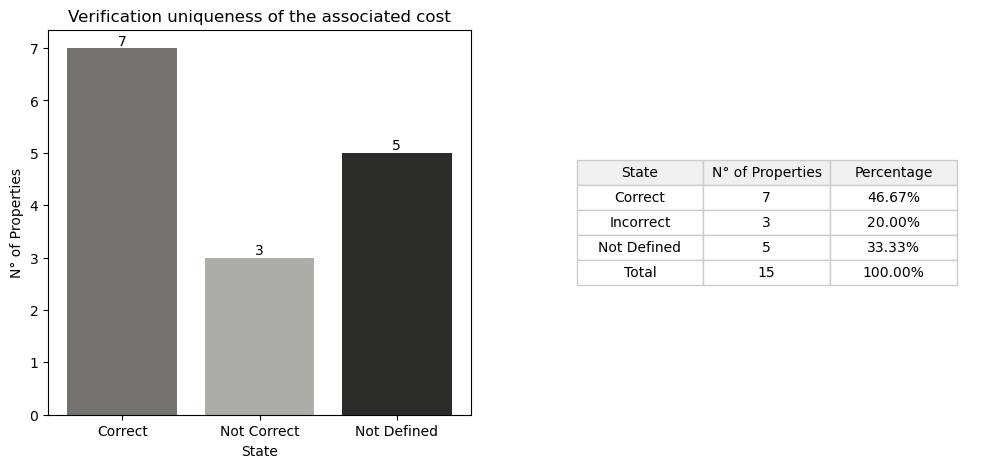

In [3]:
#percorso modello geometrico
ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Modello/" + file_name)

print("\.done")

costs_el = ifcmodel.by_type('IfcCostItem')

#stampa tutti i costi
for cost_el in costs_el:
    costvalues_el = cost_el.CostValues
    costquantities_el = cost_el.CostQuantities
    # print (f"▸ {cost_el}")
    for costvalue_el in costvalues_el:
        # print(costvalue_el)
        
        value = costvalue_el.AppliedValue
        numbvalue = costvalue_el.AppliedValue[0]
        # print(value)
        # print(numbvalue)
        
    for costquantity_el in costquantities_el:
        # print(costquantity_el)
        unitmeasure_el = costquantity_el[2]
        # print(unitmeasure_el)
        # print()
        
        
relassigns = ifcmodel.by_type('IfcRelAssignsToControl')

relation_dict = {}

for i, relassign in enumerate(relassigns):
    # Ottieni il RelatingControl
    relatingobj = relassign.RelatingControl
    # Verifica se il RelatingControl esiste e se il suo nome contiene la stringa "Concrete casting"
    if relatingobj and "Concrete casting for foundation" in relatingobj.Name:
        # Ottieni le entità collegate alla relazione
        relatedobj = relassign.RelatedObjects
        # Verifica se ci sono entità collegate e se il tipo della prima entità è IfcWall
        if relatedobj and relatedobj[0].is_a() == "IfcSlab":
            # Aggiungi la relazione al dizionario
            relation_dict[relassign] = {'relatingobj': relatingobj, 'relatedobj': relatedobj}
            print(f"{i + 1}. {relassign}")
            print(f"       > {relatingobj}")
            print(f"       - {relatedobj[0]}") 

# Stampa il dizionario
# for relassign, objs in relation_dict.items():
#     print(f"RelAssign: {relassign}")
#     print(f"Relating Object: {objs['relatingobj']}")
#     print(f"Related Object: {objs['relatedobj']}")
#     print()


            

#Ottieni dati dal COSTO nel database

import os
#per ottenere la classe IfcCostItem
#info_cost = relatingobj.get_info()
#cost_class_name = info_cost["type"]

#estrai i valori da dizionario creato
for relassign, objs in relation_dict.items():
    #rel
    rel = relassign
    #costitem 
    relatingobj = objs['relatingobj']
    #obj 
    relatedobj= objs['relatedobj']

    #Print IfcCostItem associated to Obj
    cost_name = relatingobj.Name
    cost_predefined_type = relatingobj.PredefinedType
    cost_description = relatingobj.Description
    cost_identification = relatingobj.Identification

    print("Ifc Cost Object:")
    print(f"▸ {cost_identification}")
    print(f"▸ {cost_name}.{cost_description}")
    cost_check = f"{cost_name}.{cost_description}"
    print()

    #Search the CostItem in the database
    print("Search in cost database:")
    # Folder path containing the IFC files
    folder_path = "C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Codice/COST ITEM/1_OC/"

    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Iterate over the files in the folder
    for file_name in file_list:
        if file_name.endswith(".ifc"):  # Check if the file has an .ifc extension
            file_path = os.path.join(folder_path, file_name)  # Create the full file path
            #print(f"Processing file: {file_path}")
            print(f" - {file_name}")

            # Open the IFC file
            ifc_file = ifcopenshell.open(file_path)

            costitems = ifc_file.by_type('IfcCostItem')

            #1-Print IfcCostItem
            for costitem in costitems:
                costvalues = costitem.CostValues
                costquantities = costitem.CostQuantities
                costobjtype = costitem.ObjectType

                if costobjtype == "OPERA COMPIUTA" or costobjtype == "LAVORO PROVVISIONALE":
                    #print (f"▸ {costitem.Name}")
                    costitem_name = costitem.Name
                    #print (f"▸ {cost_description}")
                    costitem_description = cost_description
                    costitem_check = costitem_name + "." + costitem_description
                    #print(costitem_check)
                    if costitem_check == cost_check:
                        print("   Found:")
                        print (f"• {costitem}")
                        costitem_choice = costitem

                        #2-Print IfcRelAssignsToProduct
                        cost_relassigns_to_products = ifc_file.by_type('IfcRelAssignsToProduct')
                        #print(cost_relassigns_to_product)
                        for cost_relassigns_to_product in cost_relassigns_to_products:
                            if len(cost_relassigns_to_products) == 1:
                                print(f" - {cost_relassigns_to_product}")

                                #Print Unitary IfcElement
                                cost_unitary_els = ifc_file.by_type('IfcElement')
                                #print(cost_unitary_els)
                                for cost_unitary_el in cost_unitary_els:
                                    if len(cost_unitary_els) == 1:
                                        print(f" - {cost_unitary_el}")
                                        #Print class name
                                        cost_info_el = cost_unitary_el.get_info()
                                        cost_unitary_el_name = cost_info_el["type"]
                                        print(f" - {cost_unitary_el_name}")
                                        #Print class PredefinedType
                                        cost_unitary_el_typeenum = cost_unitary_el.PredefinedType
                                        print(f" - {cost_unitary_el_typeenum}")

                                        #3-Print IfcRelDefinesByProperties-Pset_SlabCommon
                                        cost_reldefines_by_properties = ifc_file.by_type('IfcRelDefinesByProperties')
                                        #print(cost_reldefines_by_properties)
                                        for cost_relproperty in cost_reldefines_by_properties:
                                            if cost_relproperty.RelatedObjects[0].GlobalId == cost_unitary_el.GlobalId:
                                                print(f"   ▸ {cost_relproperty}")

                                                #Print Pset
                                                if cost_relproperty.RelatingPropertyDefinition.is_a('IfcPropertySet'):
                                                    #Print Pset_SlabCommon
                                                    if cost_relproperty.RelatingPropertyDefinition.Name == 'Pset_SlabCommon': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcsharedbldgelements/pset/pset_slabcommon.htm
                                                        cost_property_set = cost_relproperty.RelatingPropertyDefinition
                                                        print(f"   ▸ {cost_property_set}")
                                                        for cost_property in cost_property_set.HasProperties:
                                                            cost_property_name = cost_property.Name
                                                            cost_property_value = cost_property.NominalValue
                                                            cost_property_unit = cost_property.Unit
                                                            #print(f"     • {cost_property}")
                                                            if cost_property_name == 'ThermalTransmittance':
                                                                cost_property_thermaltrasmittance = cost_property
                                                            elif cost_property_name == 'AcousticRating':
                                                                cost_property_acousticrating = cost_property
                                                            elif cost_property_name == 'FireRating':
                                                                cost_property_firerating = cost_property
                                                            elif cost_property_name == 'IsExternal':
                                                                cost_property_isexternal = cost_property
                                                            elif cost_property_name == 'LoadBearing':
                                                                cost_property_loadbearing = cost_property
                                                                print(f"     ◦ {cost_property_loadbearing}")
                                                            elif cost_property_name == 'Compartmentation':
                                                                cost_property_compartimentation = cost_property    
                                                            elif cost_property_name == 'Status':
                                                                cost_property_status = cost_property
                                                            elif cost_property_name == 'PitchAngle':
                                                                cost_property_pitchangle = cost_property

                                                        break  # Break out of the inner loop and stop processing further costitems

                                        #4-Print IfcRelDefinesByProperties-Pset_ConcreteElementGeneral
                                        cost_reldefines_by_properties = ifc_file.by_type('IfcRelDefinesByProperties')
                                        #print(cost_reldefines_by_properties)
                                        for cost_relproperty in cost_reldefines_by_properties:
                                            if cost_relproperty.RelatedObjects[0].GlobalId == cost_unitary_el.GlobalId:
                                                #print(f"   ▸ {cost_relproperty}")

                                                #Print Pset
                                                if cost_relproperty.RelatingPropertyDefinition.is_a('IfcPropertySet'):
                                                    #Print Pset_ConcreteElementGeneral
                                                    if cost_relproperty.RelatingPropertyDefinition.Name == 'Pset_ConcreteElementGeneral': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcstructuralelementsdomain/pset/pset_concreteelementgeneral.htm
                                                        cost_property_set = cost_relproperty.RelatingPropertyDefinition
                                                        print(f"   ▸ {cost_property_set}")
                                                        for cost_property in cost_property_set.HasProperties:
                                                            cost_property_name = cost_property.Name
                                                            cost_property_value = cost_property.NominalValue
                                                            cost_property_unit = cost_property.Unit
                                                            #print(f"     • {cost_property}")
                                                            if cost_property_name == 'ConstructionMethod':
                                                                cost_property_constructionmethod = cost_property
                                                            elif cost_property_name == 'StructuralClass':
                                                                cost_property_structuralclass = cost_property
                                                                print(f"     ◦ {cost_property_structuralclass}")
                                                            elif cost_property_name == 'StrengthClass':
                                                                cost_property_strengthclass = cost_property
                                                                print(f"     ◦ {cost_property_strengthclass}")
                                                            elif cost_property_name == 'ExposureClass':
                                                                cost_property_exposureclass = cost_property
                                                                print(f"     ◦ {cost_property_exposureclass}")
                                                            elif cost_property_name == 'ReinforcementVolumeRatio':
                                                                cost_property_reinforcementvolumeratio = cost_property
                                                                #print(f"     ◦ {cost_property_reinforcementvolumeratio}")
                                                            elif cost_property_name == 'ReinforcementStrengthClass':
                                                                cost_property_reinforcementstrengthclass = cost_property
                                                        break  # Break out of the inner loop and stop processing further costitems

                                        #5-Print IfcRelDefinesByProperties-Qto_SlabBaseQuantities
                                        cost_reldefines_by_properties = ifc_file.by_type('IfcRelDefinesByProperties')
                                        #print(cost_reldefines_by_properties)
                                        for cost_relproperty in cost_reldefines_by_properties:
                                            if cost_relproperty.RelatedObjects[0].GlobalId == cost_unitary_el.GlobalId:
                                                #print(f"   ▸ {cost_relproperty}")

                                                #Print Qset
                                                if cost_relproperty.RelatingPropertyDefinition.is_a('IfcQuantitySet'):                                           
                                                    #Print Qto_SlabBaseQuantities
                                                    if cost_relproperty.RelatingPropertyDefinition.Name == 'Qto_SlabBaseQuantities': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcsharedbldgelements/qset/qto_slabbasequantities.htm                                                    property_set = relproperty.RelatingPropertyDefinition
                                                        cost_quantity_set = cost_relproperty.RelatingPropertyDefinition
                                                        print(f"   ▸ {cost_quantity_set}")
                                                        for cost_property in cost_quantity_set.Quantities:
                                                            cost_property_name = cost_property.Name
                                                            cost_property_unit = cost_property.Unit
                                                            cost_property_formula = cost_property.Formula

                                                            #Print class name
                                                            cost_info_qto = cost_property.get_info()
                                                            cost_qto_class_name = cost_info_qto["type"]
                                                            #print(f"    🔹 {cost_qto_class_name}")
                                                            #print(f"     • {cost_cost_property}")

                                                            if cost_qto_class_name == 'IfcQuantityLength':
                                                                cost_property_value = cost_property.LengthValue
                                                                #print(f"     ◦ {cost_property}")
                                                                #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                                #if cost_property_name == "Lenght":
                                                                    #print(f"     ◦ {cost_property}")
                                                                    #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                                #elif cost_property_name == "Width":
                                                                    #print(f"     ◦ {cost_property}")
                                                                    #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                                #elif cost_property_name == "Height":
                                                                    #print(f"     ◦ {cost_property}")
                                                                    #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                            elif cost_qto_class_name == 'IfcQuantityArea':
                                                                cost_property_value = cost_property.AreaValue
                                                                #print(f"     ◦ {cost_property}")
                                                                #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                            elif cost_qto_class_name == 'IfcQuantityCount':
                                                                cost_property_value = cost_property.CountValue
                                                                #print(f"     ◦ {cost_property}")
                                                                #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                            elif cost_qto_class_name == 'IfcQuantityTime':
                                                                cost_property_value = cost_property.TimeValue
                                                                #print(f"     ◦ {cost_property}")
                                                                #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                            elif cost_qto_class_name == 'IfcQuantityVolume':
                                                                cost_property_value = cost_property.VolumeValue
                                                                print(f"     ◦ {cost_property}")
                                                                print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")
                                                            elif cost_qto_class_name == 'IfcQuantityWeight':
                                                                cost_property_value = cost_property.WeightValue
                                                                #print(f"     ◦ {cost_property}")
                                                                #print(f"      ▹ {cost_property_name} = {cost_property_value} {cost_property_unit.Prefix} {cost_property_unit.Name}")

                                                        break  # Break out of the inner loop and stop processing further costitems

                                    else:
                                        print("Error: Multiple  unitary obj associated to the cost item")
                            else:
                                print("Error: Multiple  RelToProduct associated to the cost item") 
                        print()
                        break  # Break out of the inner loop and stop processing further costitems
                    else:
                        print("   Not found")
                        print()
                


    #Ottieni dati dell'OGGETTO dal modello

    # Stampare i valori del dizionario in un elenco puntato con ordine numerico
    print("Related Objects for each Relating Object:")
    # Estrai i valori dal dizionario creato
    for i, (relassign, objs) in enumerate(relation_dict.items(), 1):
        # Rel
        rel = relassign
        # Costitem 
        relatingobj = objs['relatingobj']
        # Obj 
        relatedobjs = objs['relatedobj']

        print(f"{i}. {relatingobj}:")

        # Stampare i valori del dizionario in un elenco puntato con ordine numerico
        for j, relatedobj in enumerate(relatedobjs, 1):
            print(f"   {j}. {relatedobj}")

            info_el = relatedobj.get_info()
            el_name = info_el["type"]
            print(f" - {el_name}")
            # Print class PredefinedType
            el_typeenum = relatedobj.PredefinedType
            print(f" - {el_typeenum}")

            #1-Print IfcRelDefinesByProperties-Pset_SlabCommon
            reldefines_by_properties = ifcmodel.by_type('IfcRelDefinesByProperties')
            #print(reldefines_by_properties)
            for relproperty in reldefines_by_properties:
                if relproperty.RelatedObjects[0].GlobalId == relatedobj.GlobalId:
                    #print(f"   ▸ {relproperty}") #stampa tutti le rel legate all'IfcElement

                    #Print Pset
                    if relproperty.RelatingPropertyDefinition.is_a('IfcPropertySet'):
                        #Print Pset_SlabCommon
                        if relproperty.RelatingPropertyDefinition.Name == 'Pset_SlabCommon': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcsharedbldgelements/pset/pset_slabcommon.htm
                            property_set = relproperty.RelatingPropertyDefinition
                            print(f"   ▸ {relproperty}") #stampa la specifica rel
                            print(f"   ▸ {property_set}")
                            for property in property_set.HasProperties:
                                property_name = property.Name
                                property_value = property.NominalValue
                                property_unit = property.Unit
                                #print(f"     • {property}")
                                if property_name == 'ThermalTransmittance':
                                    property_thermaltrasmittance = property
                                elif property_name == 'AcousticRating':
                                    property_acousticrating = property
                                elif property_name == 'FireRating':
                                    property_firerating = property
                                    print(f"     ◦ {property_firerating}")
                                elif property_name == 'IsExternal':
                                    property_isexternal = property
                                elif property_name == 'LoadBearing':
                                    property_loadbearing = property
                                    print(f"     ◦ {property_loadbearing}")
                                elif property_name == 'Compartmentation':
                                    property_compartimentation = property    
                                elif property_name == 'Status':
                                    property_status = property
                                    print(property_status)
                                elif property_name == 'PitchAngle':
                                    property_pitchangle = property

                            break  # Break out of the inner loop and stop processing further costitems


            #2-Print IfcRelDefinesByProperties-Pset_ConcreteElementGeneral
            reldefines_by_properties = ifcmodel.by_type('IfcRelDefinesByProperties')
            #print(reldefines_by_properties)
            for relproperty in reldefines_by_properties:
                if relproperty.RelatedObjects[0].GlobalId == relatedobj.GlobalId:
                    #print(f"   ▸ {relproperty}") #stampa tutti le rel legate all'IfcElement

                    #Print Pset
                    if relproperty.RelatingPropertyDefinition.is_a('IfcPropertySet'):
                        #Print Pset_ConcreteElementGeneral
                        if relproperty.RelatingPropertyDefinition.Name == 'Pset_ConcreteElementGeneral': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcstructuralelementsdomain/pset/pset_concreteelementgeneral.htm
                            property_set = relproperty.RelatingPropertyDefinition
                            print(f"   ▸ {relproperty}") #stampa la specifica rel
                            print(f"   ▸ {property_set}")
                            for property in property_set.HasProperties:
                                property_name = property.Name
                                property_value = property.NominalValue
                                property_unit = property.Unit
                                #print(f"     • {property}")
                                if property_name == 'ConstructionMethod':
                                    property_constructionmethod = property
                                elif property_name == 'StructuralClass':
                                    property_structuralclass = property
                                    print(f"     ◦ {property_structuralclass}")
                                elif property_name == 'StrengthClass':
                                    property_strengthclass = property
                                    print(f"     ◦ {property_strengthclass}")
                                elif property_name == 'ExposureClass':
                                    property_exposureclass = property
                                    print(f"     ◦ {property_exposureclass}")
                                elif property_name == 'ReinforcementVolumeRatio':
                                    property_reinforcementvolumeratio = property
                                    #print(f"     ◦ {property_reinforcementvolumeratio}")
                                elif property_name == 'ReinforcementStrengthClass':
                                    property_reinforcementstrengthclass = property
                            break  # Break out of the inner loop and stop processing further costitems

            #3-Print IfcRelDefinesByProperties-Pset_ConcreteElementGeneral
            reldefines_by_properties = ifcmodel.by_type('IfcRelDefinesByProperties')
            #print(reldefines_by_properties)
            for relproperty in reldefines_by_properties:
                if relproperty.RelatedObjects[0].GlobalId == relatedobj.GlobalId:
                    #print(f"   ▸ {relproperty}") #stampa tutti le rel legate all'IfcElement

                    #Print Qset
                    if relproperty.RelatingPropertyDefinition.is_a('IfcQuantitySet'):                                           
                        #Print Qto_SlabBaseQuantities
                        if relproperty.RelatingPropertyDefinition.Name == 'Qto_SlabBaseQuantities': #https://standards.buildingsmart.org/IFC/RELEASE/IFC4/ADD2_TC1/HTML/schema/ifcsharedbldgelements/qset/qto_slabbasequantities.htm                                                    property_set = relproperty.RelatingPropertyDefinition
                            quantity_set = relproperty.RelatingPropertyDefinition
                            print(f"   ▸ {relproperty}") #stampa la specifica rel
                            print(f"   ▸ {quantity_set}")
                            for property in quantity_set.Quantities:
                                property_name = property.Name
                                property_unit = property.Unit
                                property_formula = property.Formula
                                #property_value = property.CountValue
                                #Print class name
                                info_qto = property.get_info()
                                qto_class_name = info_qto["type"]
                                #print(f"    🔹 {qto_class_name}")
                                #print(f"     • {property}")

                                if qto_class_name == 'IfcQuantityLength':
                                    property_value = property.LengthValue
                                    #print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                    #if property_name == "Lenght":
                                        #print(f"     ◦ {property}")
                                        #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                    #elif property_name == "Width":
                                        #print(f"     ◦ {property}")
                                        #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                    #elif property_name == "Height":
                                        #print(f"     ◦ {property}")
                                        #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                elif qto_class_name == 'IfcQuantityArea':
                                    property_value = property.AreaValue
                                    #print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                elif qto_class_name == 'IfcQuantityCount':
                                    property_value = property.CountValue
                                    #print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                elif qto_class_name == 'IfcQuantityTime':
                                    property_value = property.TimeValue
                                    #print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                elif qto_class_name == 'IfcQuantityVolume':
                                    property_value = property.VolumeValue
                                    print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")
                                elif qto_class_name == 'IfcQuantityWeight':
                                    property_value = property.WeightValue
                                    #print(f"     ◦ {property}")
                                    #print(f"      ▹ {property_name} = {property_value} {property_unit.Prefix} {property_unit.Name}")

                            break  # Break out of the inner loop and stop processing further costitems                



            # Verifica prezzo associato e obj
            # List for graph
            correct_properties = {}
            incorrect_properties = {}
            not_defined_properties = {}
            not_defined_properties_cost = {}
            not_defined_properties_obj = {}

            #Check Class and TypeEnum
            print(cost_unitary_el_name)
            print(cost_unitary_el_typeenum)
            print(el_name)
            print(el_typeenum)

            if cost_unitary_el_name == el_name:
                print(f"🔸Entity: \033[92m ✓ \033[0m")
            #     correct_properties.append(cost_unitary_el_name)
                correct_properties["Entity: ✓ "] = (cost_unitary_el, relatedobj)
            else:
                print(f"🔸Entity: \033[91m ✗ \033[0m")
                incorrect_properties["Entity: ✗ "] = (cost_unitary_el, relatedobj)

            if cost_unitary_el_typeenum == el_typeenum:
                print(f"🔸TypeEnum: \033[92m ✓ \033[0m")
                correct_properties["TypeEnum: ✓ "] = (cost_unitary_el, relatedobj)
            else:
                print(f"🔸TypeEnum: \033[91m ✗ \033[0m")
                incorrect_properties["TypeEnum: ✗ "] = (cost_unitary_el, relatedobj)

            ##############################################Check Pset_WallCommon

            # Definizione di funzione per eseguire il controllo di una singola proprietà
            def check_property(property_name, cost_property_name, property_type):
                if property_name is not None and cost_property_name is not None:
                    if property_name.Name == property_type and property_name is not None:
                        print(property_name)
                    else:
                        print(f"\033[37m{property_type} not defined in OBJ\033[0m")

                    if cost_property_name.Name == property_type:
                        print(cost_property_name)
                    else:
                        print(f"\033[37m{property_type} not defined in COST ITEM\033[0m")

                    if property_name.Name != property_type or cost_property_name.Name != property_type or property_name.NominalValue[0] == "" or cost_property_name.NominalValue[0] == "":
                        print(f"🔸{property_type}: \033[1m Not Defined \033[0m")
                        incorrect_properties[property_type + ": ✗ "] = (cost_property_name, property_name)
                    elif property_name.NominalValue[0] == cost_property_name.NominalValue[0]:
                        print(f"🔸{property_type}: \033[92m ✓ \033[0m")
                        correct_properties[property_type + ": ✓ "] = (cost_property_name, property_name)
                    else:
                        print(f"🔸{property_type}: \033[91m ✗ \033[0m")
                        incorrect_properties[property_type + ": ✗ "] = (cost_property_name, property_name)
                else:
                    print(f"{property_type} None in OBJ and COST ITEM")
                    not_defined_properties["ThermalTrasmittance: ✗ "] = "property not found in OBJ and COST ITEM"

            ##############################################ThermalTrasmittance
            try:    
                check_property(property_thermaltrasmittance, cost_property_thermaltrasmittance, "ThermalTrasmittance")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_thermaltrasmittance' not in locals() and 'cost_property_thermaltrasmittance' not in locals():
                    print("\033[1;31m-- Error: ThermalTrasmittance property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["ThermalTrasmittance: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_thermaltrasmittance' not in locals():
                    print("\033[1;31m-- ThermalTrasmittance property not found in OBJ --\033[0m")
                    not_defined_properties_obj["ThermalTrasmittance: ✗ "] = "property not found in OBJ"
                elif 'cost_property_thermaltrasmittance' not in locals():
                    print("\033[1;31m-- ThermalTrasmittance property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["ThermalTrasmittance: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################AcousticRating
            try:    
                check_property(property_acousticrating, cost_property_acousticrating, "AcousticRating")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_acousticrating' not in locals() and 'cost_property_acousticrating' not in locals():
                    print("\033[1;31m-- Error: AcousticRating property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["AcousticRating: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_acousticrating' not in locals():
                    print("\033[1;31m-- AcousticRating property not found in OBJ --\033[0m")
                    not_defined_properties_obj["AcousticRating: ✗ "] = "property not found in OBJ"
                elif 'cost_property_acousticrating' not in locals():
                    print("\033[1;31m-- AcousticRating property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["AcousticRating: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################FireRating
            try:    
                check_property(property_firerating, cost_property_firerating, "FireRating")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_firerating' not in locals() and 'cost_property_firerating' not in locals():
                    print("\033[1;31m-- Error: FireRating property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["FireRating: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_firerating' not in locals():
                    print("\033[1;31m-- FireRating property not found in OBJ --\033[0m")
                    not_defined_properties_obj["FireRating: ✗ "] = "property not found in OBJ"
                elif 'cost_property_firerating' not in locals():
                    print("\033[1;31m-- FireRating property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["FireRating: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################IsExternal
            try:    
                check_property(property_isexternal, cost_property_isexternal, "IsExternal")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_isexternal' not in locals() and 'cost_property_isexternal' not in locals():
                    print("\033[1;31m-- Error: IsExternal property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["IsExternal: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_isexternal' not in locals():
                    print("\033[1;31m-- IsExternal property not found in OBJ --\033[0m")
                    not_defined_properties_obj["IsExternal: ✗ "] = "property not found in OBJ"
                elif 'cost_property_isexternal' not in locals():
                    print("\033[1;31m-- IsExternal property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["IsExternal: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################LoadBearing
            try:    
                check_property(property_loadbearing, cost_property_loadbearing, "LoadBearing")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_loadbearing' not in locals() and 'cost_property_loadbearing' not in locals():
                    print("\033[1;31m-- Error: LoadBearing property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["LoadBearing: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_loadbearing' not in locals():
                    print("\033[1;31m-- LoadBearing property not found in OBJ --\033[0m")
                    not_defined_properties_obj["LoadBearing: ✗ "] = "property not found in OBJ"
                elif 'cost_property_loadbearing' not in locals():
                    print("\033[1;31m-- LoadBearing property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["LoadBearing: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################Compartimentation
            try:    
                check_property(property_compartimentation, cost_property_compartimentation, "Compartimentation")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_compartimentation' not in locals() and 'cost_property_compartimentation' not in locals():
                    print("\033[1;31m-- Error: Compartimentation property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["Compartimentation: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_compartimentation' not in locals():
                    print("\033[1;31m-- Compartimentation property not found in OBJ --\033[0m")
                    not_defined_properties_obj["Compartimentation: ✗ "] = "property not found in OBJ"
                elif 'cost_property_compartimentation' not in locals():
                    print("\033[1;31m-- Compartimentation property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["Compartimentation: ✗ "] = "property not found in COST ITEM"    
            print()

            ##############################################Status
            try:    
                check_property(property_status, cost_property_status, "Status")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_status' not in locals() and 'cost_property_status' not in locals():
                    print("\033[1;31m-- Error: Status property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["Status: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_status' not in locals():
                    print("\033[1;31m-- Status property not found in OBJ --\033[0m")
                    not_defined_properties_obj["Status: ✗ "] = "property not found in OBJ"
                elif 'cost_property_status' not in locals():
                    print("\033[1;31m-- Status property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["Status: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################PitchAngle
            try:    
                check_property(property_pitchangle, cost_property_pitchangle, "PitchAngle")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_pitchangle' not in locals() and 'cost_property_pitchangle' not in locals():
                    print("\033[1;31m-- Error: PitchAngle property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["PitchAngle: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_pitchangle' not in locals():
                    print("\033[1;31m-- PitchAngle property not found in OBJ --\033[0m")
                    not_defined_properties_obj["PitchAngle: ✗ "] = "property not found in OBJ"
                elif 'cost_property_pitchangle' not in locals():
                    print("\033[1;31m-- PitchAngle property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["PitchAngle: ✗ "] = "property not found in COST ITEM"

            ##############################################Check Pset_ConcreteElementGeneral

            ##############################################ConstructionMethod
            try:    
                check_property(property_constructionmethod, cost_property_constructionmethod, "ConstructionMethod")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_constructionmethod' not in locals() and 'cost_property_constructionmethod' not in locals():
                    print("\033[1;31m-- Error: ConstructionMethod property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["ConstructionMethod: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_constructionmethod' not in locals():
                    print("\033[1;31m-- ConstructionMethod property not found in OBJ --\033[0m")
                    not_defined_properties_obj["ConstructionMethod: ✗ "] = "property not found in OBJ"
                elif 'cost_property_constructionmethod' not in locals():
                    print("\033[1;31m-- ConstructionMethod property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["ConstructionMethod: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################StructuralClass
            try:    
                check_property(property_structuralclass, cost_property_structuralclass, "StructuralClass")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_structuralclass' not in locals() and 'cost_property_structuralclass' not in locals():
                    print("\033[1;31m-- Error: StructuralClass property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["StructuralClass: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_structuralclass' not in locals():
                    print("\033[1;31m-- StructuralClass property not found in OBJ --\033[0m")
                    not_defined_properties_obj["StructuralClass: ✗ "] = "property not found in OBJ"
                elif 'cost_property_structuralclass' not in locals():
                    print("\033[1;31m-- StructuralClass property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["StructuralClass: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################StrengthClass
            try:    
                check_property(property_strengthclass, cost_property_strengthclass, "StrengthClass")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_strengthclass' not in locals() and 'cost_property_strengthclass' not in locals():
                    print("\033[1;31m-- Error: StrengthClass property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["StrengthClass: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_strengthclass' not in locals():
                    print("\033[1;31m-- StrengthClass property not found in OBJ --\033[0m")
                    not_defined_properties_obj["StrengthClass: ✗ "] = "property not found in OBJ"
                elif 'cost_property_strengthclass' not in locals():
                    print("\033[1;31m-- StrengthClass property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["StrengthClass: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################ExposureClass
            try:    
                check_property(property_exposureclass, cost_property_exposureclass, "ExposureClass")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_exposureclass' not in locals() and 'cost_property_exposureclass' not in locals():
                    print("\033[1;31m-- Error: ExposureClass property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["ExposureClass: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_exposureclass' not in locals():
                    print("\033[1;31m-- ExposureClass property not found in OBJ --\033[0m")
                    not_defined_properties_obj["ExposureClass: ✗ "] = "property not found in OBJ"
                elif 'cost_property_exposureclass' not in locals():
                    print("\033[1;31m-- ExposureClass property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["ExposureClass: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################ReinforcementVolumeRatio
            try:    
                check_property(property_reinforcementvolumeratio, cost_property_reinforcementvolumeratio, "ReinforcementVolumeRatio")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_reinforcementvolumeratio' not in locals() and 'cost_property_reinforcementvolumeratio' not in locals():
                    print("\033[1;31m-- Error: ReinforcementVolumeRatio property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["ReinforcementVolumeRatio: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_reinforcementvolumeratio' not in locals():
                    print("\033[1;31m-- ReinforcementVolumeRatio property not found in OBJ --\033[0m")
                    not_defined_properties_obj["ReinforcementVolumeRatio: ✗ "] = "property not found in OBJ"
                elif 'cost_property_reinforcementvolumeratio' not in locals():
                    print("\033[1;31m-- ReinforcementVolumeRatio property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["ReinforcementVolumeRatio: ✗ "] = "property not found in COST ITEM"
            print()

            ##############################################ReinforcementStrengthClass
            try:    
                check_property(property_reinforcementstrengthclass, cost_property_reinforcementstrengthclass, "ReinforcementStrengthClass")
            except NameError:
                # Verifica quale delle due variabili ha generato l'errore
                if 'property_reinforcementstrengthclass' not in locals() and 'cost_property_reinforcementstrengthclass' not in locals():
                    print("\033[1;31m-- Error: ReinforcementStrengthClass property not found in OBJ and COST ITEM --\033[0m")
                    not_defined_properties["ReinforcementStrengthClass: ✗ "] = "property not found in OBJ and COST ITEM"
                elif 'property_reinforcementstrengthclass' not in locals():
                    print("\033[1;31m-- ReinforcementStrengthClass property not found in OBJ --\033[0m")
                    not_defined_properties_obj["ReinforcementStrengthClass: ✗ "] = "property not found in OBJ"
                elif 'cost_property_reinforcementstrengthclass' not in locals():
                    print("\033[1;31m-- ReinforcementStrengthClass property not found in COST ITEM --\033[0m")
                    not_defined_properties_cost["ReinforcementStrengthClass: ✗ "] = "property not found in COST ITEM"



            # Stampa delle proprietà corrette
            print("\033[1m-Correct properties: \033[0m")
            for prop in correct_properties:
                print(prop)

            print()

            # Stampa delle proprietà non corrette
            print("\033[1m-Incorrect properties: \033[0m")
            for prop in incorrect_properties:
                print(prop)

            print()

            # Stampa delle proprietà non corrette
            print("\033[1m-Not Defined properties: \033[0m")
            for prop in not_defined_properties:
                print(prop)

            print()

            # Stampa delle proprietà non corrette
            print("\033[1m-Not Defined properties in the cost item: \033[0m")
            for prop in not_defined_properties_cost:
                print(prop)

            print()

            # Stampa delle proprietà non corrette
            print("\033[1m-Not Defined properties in the obj: \033[0m")
            for prop in not_defined_properties_obj:
                print(prop)



            # Ottieni la data di oggi
            from datetime import date

            # Ottieni la data di oggi
            oggi = date.today()

            # Formatta la data come stringa senza separatori
            data_formattata = oggi.strftime("%Y%m%d")

            # Nome file di output
            file_name_output = data_formattata + '_'  + str(cost_unitary_el_name) + '_' + str(relatedobj.GlobalId) + '_' + str(relatingobj.GlobalId)

            print(file_name_output)

            import os
            from docx.shared import Inches
            from docx import Document
            import matplotlib.pyplot as plt
            from docx.shared import RGBColor
            from docx.shared import Pt
            from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
            from docx.enum.table import WD_CELL_VERTICAL_ALIGNMENT
            from docx.enum.table import WD_TABLE_ALIGNMENT
            from docx.enum.text import WD_LINE_SPACING

            #crea cartella con data odierna
            new_path="C:/Users/jacop/OneDrive - Politecnico di Milano/00-Pubblicazioni/00-01_Articoli - Jacopo Cassandro/08_Journal_ITCON_2024_IFC cost/Codice/VERIFICATION_OUTPUT/"

            # Calcolo il numero di proprietà corrette e non corrette
            num_correct = len(correct_properties)
            num_incorrect = len(incorrect_properties)
            num_notdefined_obj = len(not_defined_properties_obj)
            num_notdefined_cost = len(not_defined_properties_cost)
            num_notdefined = len(not_defined_properties)

            # Creo una lista di valori per il grafico a barre
            values = [num_correct, num_incorrect, num_notdefined_obj]

            # Etichette per le barre del grafico
            labels = ['Correct', 'Not Correct', 'Not Defined']

            # Colori delle barre
            colors = ['#73726E', '#ADADA7', '#2B2B2A']

            # Calcolo la percentuale
            total_properties = num_correct + num_incorrect + num_notdefined_obj
            percent_correct = (num_correct / total_properties) * 100
            percent_incorrect = (num_incorrect / total_properties) * 100
            percent_notdefined_obj = (num_notdefined_obj / total_properties) * 100

            # Creo la figura e gli assi
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Grafico a barre a sinistra
            ax1.bar(labels, values, color=colors)

            # Aggiungo titoli e label agli assi del grafico a barre
            ax1.set_title('Verification uniqueness of the associated cost')
            ax1.set_xlabel('State')
            ax1.set_ylabel('N° of Properties')

            # Imposto il formato degli assi per mostrare solo numeri interi
            ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

            # Mostra il numero delle proprietà sopra le barre
            for i, value in enumerate(values):
                ax1.text(i, value, str(value), ha='center', va='bottom')

            # Tabella a destra
            table_data = [
                ['State', 'N° of Properties', 'Percentage'],
                ['Correct', num_correct, f'{percent_correct:.2f}%'],
                ['Incorrect', num_incorrect, f'{percent_incorrect:.2f}%'],
                ['Not Defined', num_notdefined_obj, f'{percent_notdefined_obj:.2f}%'],
                ['Total', total_properties, '100.00%']
            ]

            # Creo la tabella
            table = ax2.table(cellText=table_data, loc='center',
                              cellLoc='center', colWidths=[0.3, 0.3, 0.3], edges='closed')
            table.auto_set_font_size(False)

            # Nascondo gli assi del secondo plot
            ax2.axis('off')

            # Imposto lo stile della tabella
            table.auto_set_font_size(False)
            table.set_fontsize(10)

            # Ridimensiono le colonne della tabella
            table.scale(1, 1.5)

            # Coloro la riga 1 della tabella in grigio chiaro
            for key, cell in table.get_celld().items():
                if key[0] == 0:
                    cell.set_facecolor('#F0F0F0')  # Grigio chiaro
                cell.set_edgecolor('#CCCCCC')  # Colore dei bordi grigio
                cell.set_linewidth(1)  # Spessore del bordo

            # Salva il grafico come immagine
            from datetime import date

            # Salva il grafico come immagine
            plt.savefig(new_path + file_name_output + ".png", bbox_inches='tight')

            # Crea un nuovo documento Word
            doc = Document()

            # Aggiungi il titolo del report
            title = doc.add_heading('Validation Report Cost-Obj', level=1)
            title.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER  # Centra il titolo
            run = title.runs[0]
            font = run.font
            font.name = 'Times New Roman'  # Cambia il tipo di carattere
            font.size = Pt(24)  # Imposta la dimensione del carattere a 24 punti
            font.bold = True  # Rende il testo in grassetto
            font.color.rgb = RGBColor(36,45,56)  # Imposta il colore del testo a rosso (RGB: 255, 0, 0)

            # Aggiungi il sottotitolo
            subtitle = doc.add_heading('Summary Report', level=2)
            run = subtitle.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(18)
            font.italic = True  # Rende il testo in corsivo
            font.color.rgb = RGBColor(68,84,106)

            ####################################OBJ
            paragraph = doc.add_paragraph(str("OBJECT"))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(13)
            font.italic = True  # Rende il testo in corsivo
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.SINGLE  # Interlinea singola

            paragraph = doc.add_paragraph(str(el_name) + '.' + str(el_typeenum))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # Imposta la spaziatura tra paragrafi a 0
            doc.styles['Normal'].paragraph_format.space_before = Pt(3)

            paragraph = doc.add_paragraph("GlobalId: " + str(relatedobj.GlobalId))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # Imposta la spaziatura tra paragrafi a 0
            doc.styles['Normal'].paragraph_format.space_before = Pt(0)

            paragraph = doc.add_paragraph("Obj Name: " + str(relatedobj.Name))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(0)
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.DOUBLE  # Interlinea doppia

            ####################################COST
            paragraph = doc.add_paragraph(str("COST ITEM"))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(13)
            font.italic = True  # Rende il testo in corsivo
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.SINGLE  # Interlinea singola

            paragraph = doc.add_paragraph(str(relatingobj.is_a()))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # Imposta la spaziatura tra paragrafi a 0
            doc.styles['Normal'].paragraph_format.space_before = Pt(3)

            paragraph = doc.add_paragraph("Price List Code: " + str(cost_identification))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # Imposta la spaziatura tra paragrafi a 0
            doc.styles['Normal'].paragraph_format.space_before = Pt(0)

            paragraph = doc.add_paragraph("GlobalId: " + str(relatingobj.GlobalId))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # Imposta la spaziatura tra paragrafi a 0
            doc.styles['Normal'].paragraph_format.space_before = Pt(0)

            paragraph = doc.add_paragraph("Cost Name: " + str(relatingobj.Name))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            paragraph_format = paragraph.paragraph_format
            # Rimuovi la spaziatura tra paragrafi
            doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            # # Imposta la spaziatura tra paragrafi a 0
            # doc.styles['Normal'].paragraph_format.space_before = Pt(0)

            # paragraph = doc.add_paragraph("Cost Description: " + str(relatingobj.Description)))
            # run = paragraph.runs[0]
            # font = run.font
            # font.name = 'Times New Roman'
            # font.size = Pt(9)
            # # Rimuovi la spaziatura tra paragrafi
            # doc.styles['Normal'].paragraph_format.space_after = Pt(1)
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.DOUBLE  # Interlinea doppia

            # # Aggiunta di spaziatura tra i paragrafi
            # doc.add_paragraph("")  # Aggiungi un paragrafo vuoto per la spaziatura

            ####################################IMG
            paragraph = doc.add_paragraph(str("CHART"))
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(13)
            font.italic = True  # Rende il testo in corsivo
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.DOUBLE  # Interlinea singola

            # Aggiungi l'immagine al documento
            doc.add_picture(new_path + file_name_output + ".png", width=Inches(6))

            # Inserimento di un'interruzione di pagina
            doc.add_page_break()

            ####################################DETAIL TABLE
            subtitle = doc.add_heading('Detail Table', level=2)
            run = subtitle.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(18)
            font.italic = True  # Rende il testo in corsivo
            font.color.rgb = RGBColor(68,84,106)

            # Creazione di una tabella
            table = doc.add_table(rows=6, cols=3)

            # Impostazione dell'allineamento della tabella
            table.alignment = WD_TABLE_ALIGNMENT.CENTER

            # Inserimento dei dati nella tabella
            table.cell(0, 0).text = 'State'
            table.cell(0, 1).text = 'N° of Properties'
            table.cell(0, 2).text = 'Properties'

            table.cell(1, 0).text = 'Correct'
            table.cell(1, 1).text = str(num_correct)
            # Ottieni le chiavi e rimuovi gli ultimi tre caratteri
            correct_keys = '\n'.join([key[:-4] for key in correct_properties.keys()])
            table.cell(1, 2).text = correct_keys

            table.cell(2, 0).text = 'Incorrect'
            table.cell(2, 1).text = str(num_incorrect)
            # Ottieni le chiavi e rimuovi gli ultimi tre caratteri
            incorrect_keys = '\n'.join([key[:-4] for key in incorrect_properties.keys()])
            table.cell(2, 2).text = incorrect_keys

            table.cell(3, 0).text = 'Not Defined in the obj'
            table.cell(3, 1).text = str(num_notdefined_obj)
            # Ottieni le chiavi e rimuovi gli ultimi tre caratteri
            notdefinedobj_keys = '\n'.join([key[:-4] for key in not_defined_properties_obj.keys()])
            table.cell(3, 2).text = notdefinedobj_keys

            table.cell(4, 0).text = 'Not Defined in the cost'
            table.cell(4, 1).text = str(num_notdefined_cost)
            # Ottieni le chiavi e rimuovi gli ultimi tre caratteri
            notdefinedcost_keys = '\n'.join([key[:-4] for key in not_defined_properties_cost.keys()])
            table.cell(4, 2).text = notdefinedcost_keys

            table.cell(5, 0).text = 'Not Defined in the cost and obj'
            table.cell(5, 1).text = str(num_notdefined)
            # Ottieni le chiavi e rimuovi gli ultimi tre caratteri
            notdefined_keys = '\n'.join([key[:-4] for key in not_defined_properties.keys()])
            table.cell(5, 2).text = notdefined_keys

            # Impostazione dello stile della tabella
            for row in table.rows:
                for cell in row.cells:
                    for paragraph in cell.paragraphs:
                        for run in paragraph.runs:
                            font = run.font
                            font.size = Pt(10)

            # Imposta il testo, lo stile in grassetto, la dimensione del carattere e l'allineamento al centro per le celle della prima riga
            for col_idx, text in enumerate(['State', 'N° of Properties', 'Properties']):
                cell = table.cell(0, col_idx)
                cell.text = text
                for paragraph in cell.paragraphs:
                    for run in paragraph.runs:
                        run.font.bold = True
                        run.font.size = Pt(12)  # Aumenta la dimensione del carattere a 12 punti
                        paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER  # Allinea il testo al centro


            # Aggiungi bordi alla tabella
            table.style = 'Table Grid'  # Applica uno stile di griglia alla tabella

            # Aggiunta di spaziatura tra i paragrafi
            doc.add_paragraph("")  # Aggiungi un paragrafo vuoto per la spaziatura
            doc.add_paragraph("")  # Aggiungi un paragrafo vuoto per la spaziatura

            ####################################DETAILED REPORT
            # Aggiungi altre informazioni al documento
            subtitle = doc.add_heading('Detail Report', level=2)
            run = subtitle.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(18)
            font.italic = True  # Rende il testo in corsivo
            font.color.rgb = RGBColor(68,84,106)
            paragraph_format = paragraph.paragraph_format
            paragraph_format.line_spacing_rule = WD_LINE_SPACING.SINGLE  # Interlinea singola

            ####################################CORRECT PROP
            paragraph = doc.add_paragraph(f'🔸Number of Correct Properties: {num_correct}')
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            font.bold = True  # Rende il testo in grassetto

            paragraph = doc.add_paragraph()  # Crea un nuovo paragrafo
            # Itera attraverso il dizionario correct_properties
            for key, value in correct_properties.items():
                # Aggiungi la chiave come un Run separato nel paragrafo
                key_run = paragraph.add_run(f'{key}')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
                # Se il valore è una tupla
                if isinstance(value, tuple):
                    # Itera attraverso gli elementi della tupla
                    for item in value:
                        # Aggiungi ogni elemento della tupla come un Run separato nel paragrafo
                        item_run = paragraph.add_run(f' •  {item} ')
                        # Aggiungi una nuova riga
                        paragraph.add_run('\n')
                else:
                    # Se il valore non è una tupla, aggiungilo direttamente come un Run nel paragrafo
                    value_run = paragraph.add_run(f' •  {value}\n')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
            # Imposta il font del paragrafo
            if paragraph.runs:
                font = paragraph.runs[0].font
                font.name = 'Times New Roman'
                font.size = Pt(11)

            ####################################INCORRECT PROP
            paragraph = doc.add_paragraph(f'🔸Number of Incorrect Properties: {num_incorrect}')
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            font.bold = True  # Rende il testo in grassetto

            paragraph = doc.add_paragraph()  # Crea un nuovo paragrafo
            # Itera attraverso il dizionario correct_properties
            for key, value in incorrect_properties.items():
                # Aggiungi la chiave come un Run separato nel paragrafo
                key_run = paragraph.add_run(f'{key}')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
                # Se il valore è una tupla
                if isinstance(value, tuple):
                    # Itera attraverso gli elementi della tupla
                    for item in value:
                        # Aggiungi ogni elemento della tupla come un Run separato nel paragrafo
                        item_run = paragraph.add_run(f' •  {item} ')
                        # Aggiungi una nuova riga
                        paragraph.add_run('\n')
                else:
                    # Se il valore non è una tupla, aggiungilo direttamente come un Run nel paragrafo
                    value_run = paragraph.add_run(f' •  {value}\n')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
            # Imposta il font del paragrafo
            if paragraph.runs:
                font = paragraph.runs[0].font
                font.name = 'Times New Roman'
                font.size = Pt(11)

            ####################################NOT DEF PROP OBJ
            paragraph = doc.add_paragraph(f'🔸Number of Not Defined Properties in Obj: {num_notdefined_obj}')
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            font.bold = True  # Rende il testo in grassetto

            paragraph = doc.add_paragraph()  # Crea un nuovo paragrafo
            # Itera attraverso il dizionario correct_properties
            for key, value in not_defined_properties_obj.items():
                # Aggiungi la chiave come un Run separato nel paragrafo
                key_run = paragraph.add_run(f'{key}')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
                # Se il valore è una tupla
                if isinstance(value, tuple):
                    # Itera attraverso gli elementi della tupla
                    for item in value:
                        # Aggiungi ogni elemento della tupla come un Run separato nel paragrafo
                        item_run = paragraph.add_run(f' •  {item} ')
                        # Aggiungi una nuova riga
                        paragraph.add_run('\n')
                else:
                    # Se il valore non è una tupla, aggiungilo direttamente come un Run nel paragrafo
                    value_run = paragraph.add_run(f' •  {value}\n')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
            # Imposta il font del paragrafo
            if paragraph.runs:
                font = paragraph.runs[0].font
                font.name = 'Times New Roman'
                font.size = Pt(11)

            ####################################NOT DEF PROP COST
            paragraph = doc.add_paragraph(f'🔸Number of Not Defined Properties in Cost Item: {num_notdefined_cost}')
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            font.bold = True  # Rende il testo in grassetto

            paragraph = doc.add_paragraph()  # Crea un nuovo paragrafo
            # Itera attraverso il dizionario correct_properties
            for key, value in not_defined_properties_cost.items():
                # Aggiungi la chiave come un Run separato nel paragrafo
                key_run = paragraph.add_run(f'{key}')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
                # Se il valore è una tupla
                if isinstance(value, tuple):
                    # Itera attraverso gli elementi della tupla
                    for item in value:
                        # Aggiungi ogni elemento della tupla come un Run separato nel paragrafo
                        item_run = paragraph.add_run(f' •  {item} ')
                        # Aggiungi una nuova riga
                        paragraph.add_run('\n')
                else:
                    # Se il valore non è una tupla, aggiungilo direttamente come un Run nel paragrafo
                    value_run = paragraph.add_run(f' •  {value}\n')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
            # Imposta il font del paragrafo
            if paragraph.runs:
                font = paragraph.runs[0].font
                font.name = 'Times New Roman'
                font.size = Pt(11)

            ####################################NOT DEF PROP
            paragraph = doc.add_paragraph(f'🔸Number of Not Defined Properties in Cost Item and Obj: {num_notdefined}')
            run = paragraph.runs[0]
            font = run.font
            font.name = 'Times New Roman'
            font.size = Pt(11)
            font.bold = True  # Rende il testo in grassetto

            paragraph = doc.add_paragraph()  # Crea un nuovo paragrafo
            # Itera attraverso il dizionario correct_properties
            for key, value in not_defined_properties.items():
                # Aggiungi la chiave come un Run separato nel paragrafo
                key_run = paragraph.add_run(f'{key}')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
                # Se il valore è una tupla
                if isinstance(value, tuple):
                    # Itera attraverso gli elementi della tupla
                    for item in value:
                        # Aggiungi ogni elemento della tupla come un Run separato nel paragrafo
                        item_run = paragraph.add_run(f' •  {item} ')
                        # Aggiungi una nuova riga
                        paragraph.add_run('\n')
                else:
                    # Se il valore non è una tupla, aggiungilo direttamente come un Run nel paragrafo
                    value_run = paragraph.add_run(f' •  {value}\n')
                # Aggiungi una nuova riga
                paragraph.add_run('\n')
            # Imposta il font del paragrafo
            if paragraph.runs:
                font = paragraph.runs[0].font
                font.name = 'Times New Roman'
                font.size = Pt(11)


            # Salva il documento
            # file_name_output = str(el_name) + '.' + str(el_typeenum) + '_' + str(relatedobj.GlobalId)

            doc.save(new_path + file_name_output + ".docx")
            print("\.done")